In [39]:
from pathlib import Path
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
os.chdir('/home/weedsci/matt/SemiF-AnnotationPipeline')
from semif_utils.utils import get_cutout_meta

In [65]:
path = f"data/semifield-cutouts/4_batches.csv"
df = pd.read_csv(path)
# Create single path column for cutout locations
df["path"] = df["blob_home"] + "/" + df["data_root"] + "/" + df["cutout_path"]

# Filter to get good examples
filt_df = df.query(
    'is_green == True & \
        is_primary == True & \
            extends_border == False & \
                area > 5000 & \
                    green_sum > 50000')
filt_df.head()


,index,blob_home,data_root,batch_id,image_id,cutout_num,datetime,cutout_id,cutout_path,is_primary,...,axis_major_length,axis_minor_length,centroid0,centroid1,eccentricity,solidity,perimeter,is_green,green_sum,path
27,0,data,semifield-cutouts,NC_2022-07-14,NC_1657822102,3,2022:07:14 14:07:15,NC_1657822102_3,NC_2022-07-14/NC_1657822102_3.png,True,...,2340.355027,2162.948255,1226.633188,1355.756626,0.381917,0.736443,28524.681005,True,2499879,data/semifield-cutouts/NC_2022-07-14/NC_165782...
71,0,data,semifield-cutouts,NC_2022-07-14,NC_1657808369,0,2022:07:14 10:18:23,NC_1657808369_0,NC_2022-07-14/NC_1657808369_0.png,True,...,598.825325,428.012128,225.635036,313.075848,0.699377,0.454899,5242.781418,True,69485,data/semifield-cutouts/NC_2022-07-14/NC_165780...
99,0,data,semifield-cutouts,NC_2022-07-14,NC_1657826214,3,2022:07:14 15:15:47,NC_1657826214_3,NC_2022-07-14/NC_1657826214_3.png,True,...,1318.309891,1039.072315,710.135180,629.076681,0.615438,0.780222,9100.187981,True,653086,data/semifield-cutouts/NC_2022-07-14/NC_165782...
141,0,data,semifield-cutouts,NC_2022-07-14,NC_1657827339,0,2022:07:14 15:34:33,NC_1657827339_0,NC_2022-07-14/NC_1657827339_0.png,True,...,1819.496514,1455.337703,866.924137,661.955193,0.600190,0.546799,12555.706197,True,872956,data/semifield-cutouts/NC_2022-07-14/NC_165782...
169,0,data,semifield-cutouts,NC_2022-07-14,NC_1657822277,0,2022:07:14 14:10:11,NC_1657822277_0,NC_2022-07-14/NC_1657822277_0.png,True,...,1953.938877,1668.994483,1012.048145,1208.947410,0.519995,0.669063,17031.276324,True,1600055,data/semifield-cutouts/NC_2022-07-14/NC_165782...


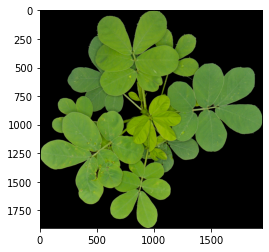

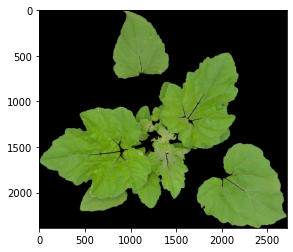

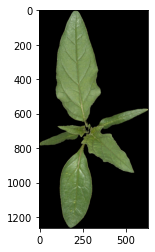

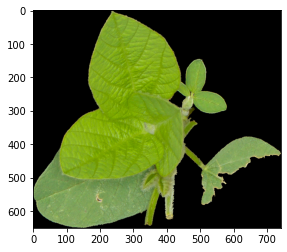

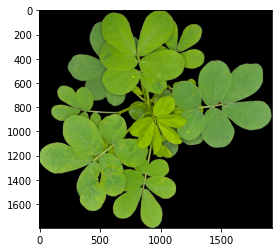

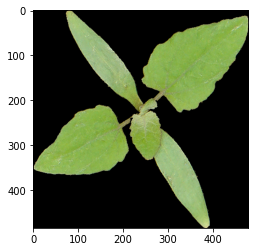

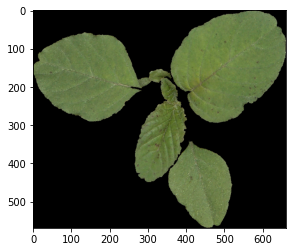

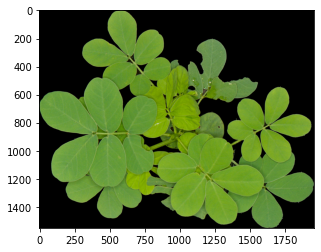

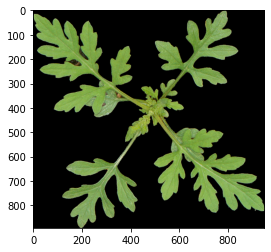

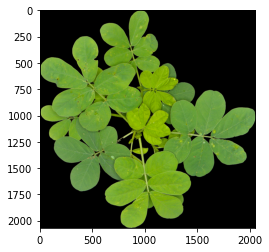

In [28]:
paths = filt_df["path"]
samp = paths.sample(n=10)
for sam in samp:
    img = cv2.cvtColor(cv2.imread(sam), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [68]:
# Load and view metadata information as dataclass
meta_df = df[df['path'].isin(samp)]
meta_dataclasses = []
for meta_img in list(meta_df["path"]):
    meta_json_path = meta_img.replace("png", "json")
    meta_dataclasses.append(get_cutout_meta(meta_json_path))
# View single dataclasses
meta_dataclasses[0]
len(meta_dataclasses)

10

In [69]:
# Move jsons and cutouts to single example folder
dstdir = "data/semifield-cutouts/examples"
for meta_img in list(meta_df["path"]):
    meta_img_src =  Path(meta_img)
    meta_json_src = Path(meta_img.replace("png", "json"))

    meta_img_dst = Path(dstdir, meta_img_src.name)
    meta_json_dst = Path(dstdir, meta_json_src.name)
    
    # shutil.copy2(meta_img_src, meta_img_dst)
    # shutil.copy2(meta_json_src, meta_json_dst)

In [78]:
# Get original image files
all_images = [x for x in Path("/media/hdd1/mkutu/wir/semifield-developed-images/").glob("*/autosfm/downscaled_photos/*.jpg")]

# Create single path column for original image name used later on
meta_df["image_path"] = df["batch_id"] + "/" + "autosfm/downscaled_photos/" + df["image_id"] + ".jpg" # Temp locaiton, not true res images
meta_df["image_meta_path"] = df["batch_id"] + "/" + "metadata/" + df["image_id"] + ".json" # Temp locaiton, not true res images

for dsimg in list(meta_df["image_meta_path"]):
    imgsrc = Path("/media/hdd1/mkutu/wir/semifield-developed-images", dsimg)
    imgdst = Path(dstdir, imgsrc.name)
    shutil.copy2(imgsrc, imgdst)
    print(imgsrc)

# meta_df

/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657806139.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657815168.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657806410.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657808128.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657806452.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657825918.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657806586.json
/media/hdd1/mkutu/wir/semifield-developed-images/NC_2022-07-14/metadata/NC_1657816020.json
/media/hdd1/mkutu/wir/semifield-developed-images/MD_2022-07-01/metadata/MD_Row-21_1656703453.json
/media/hdd1/mkutu/wir/semifield-developed-images/MD_2022-07-01/metadata/MD_Row-8_1656697476.json


/tmp/ipykernel_237120/2260039673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df["image_path"] = df["batch_id"] + "/" + "autosfm/downscaled_photos/" + df["image_id"] + ".jpg" # Temp locaiton, not true res images
/tmp/ipykernel_237120/2260039673.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df["image_meta_path"] = df["batch_id"] + "/" + "metadata/" + df["image_id"] + ".json" # Temp locaiton, not true res images


In [80]:
meta_df.to_csv("/media/weedsci/FC4C-136B/examples/examples.csv")